In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://drive.google.com/file/d/1FI9zDpSWRSegj515TO7JwUUArevFm0Yy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [ ]:
df.shape

(2023070, 4)

In [ ]:
df.columns

Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')

In [ ]:
df = df.drop_duplicates()
df.shape

(2023070, 4)

In [ ]:
print('number of unique values in col :')
for c in df.columns:
    unique = len(df[c].unique())
    if (unique <= 20):
        print('-----> CATEGORICAL -----> ', end='')
    print(c,'= ', unique)

number of unique values in col :
UserId =  1210271
ProductId =  249274
-----> CATEGORICAL -----> Rating =  5
Timestamp =  4231


In [ ]:
df.isna().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2023070.0,4.149036e+00,1.311505e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,2023070.0,1.360389e+09,4.611860e+07,908755200.0,1.350259e+09,1.372810e+09,1.391472e+09,1.406074e+09


## univariate variable analysis

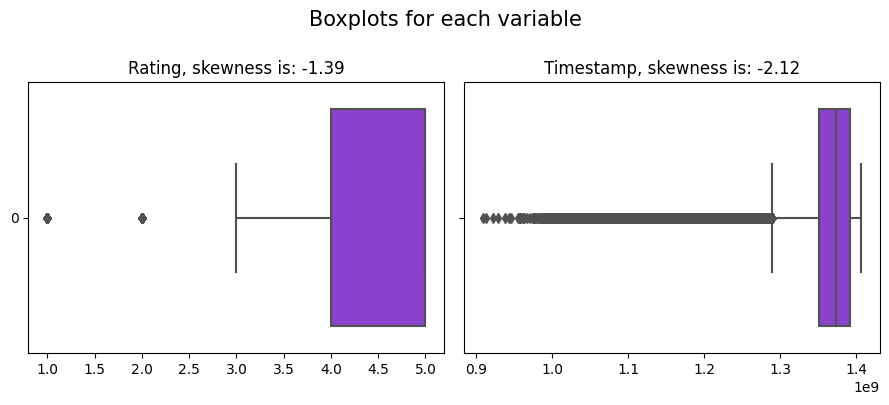

In [ ]:
import seaborn as sns

numeric_columns = ['Rating', 'Timestamp']
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(9,4))
    fig.suptitle(suptitle,y=1, size=15)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], color= 'blueviolet')
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=2, suptitle='Boxplots for each variable')
plt.tight_layout()

<Axes: xlabel='Timestamp', ylabel='Density'>

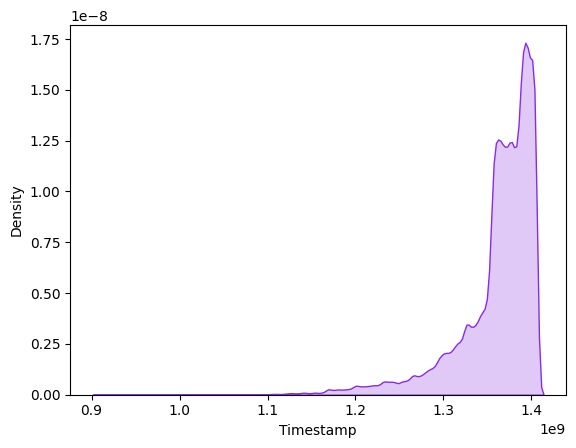

In [ ]:
sns.kdeplot(df["Timestamp"], fill=True, color = 'blueviolet')

<Axes: xlabel='Timestamp', ylabel='Density'>

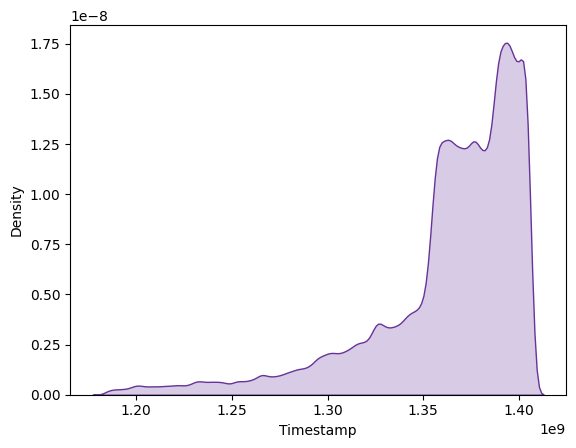

In [ ]:
p99 = df["Timestamp"].quantile(0.01)
sns.kdeplot(x="Timestamp", data=df[df["Timestamp"] >= p99], fill=True, color = 'rebeccapurple')

In [ ]:
import datetime

unix_time = 1200000000

# Convert Unix time to a datetime object
date = datetime.datetime.fromtimestamp(unix_time)
print(date)

2008-01-10 21:20:00


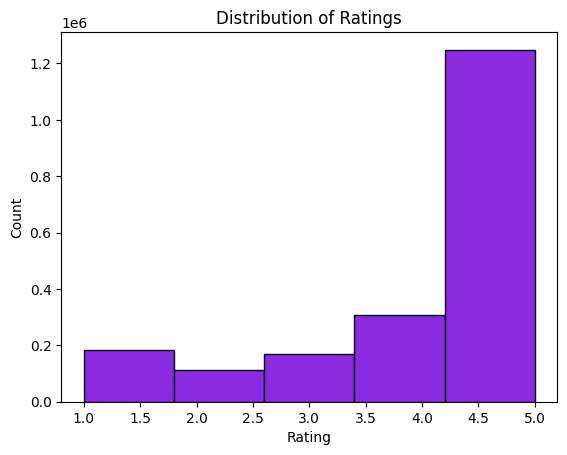

In [ ]:
# Plot histogram of ratings
plt.hist(df['Rating'], bins=5, edgecolor='black', color= 'blueviolet')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

## multivarite variable analysis

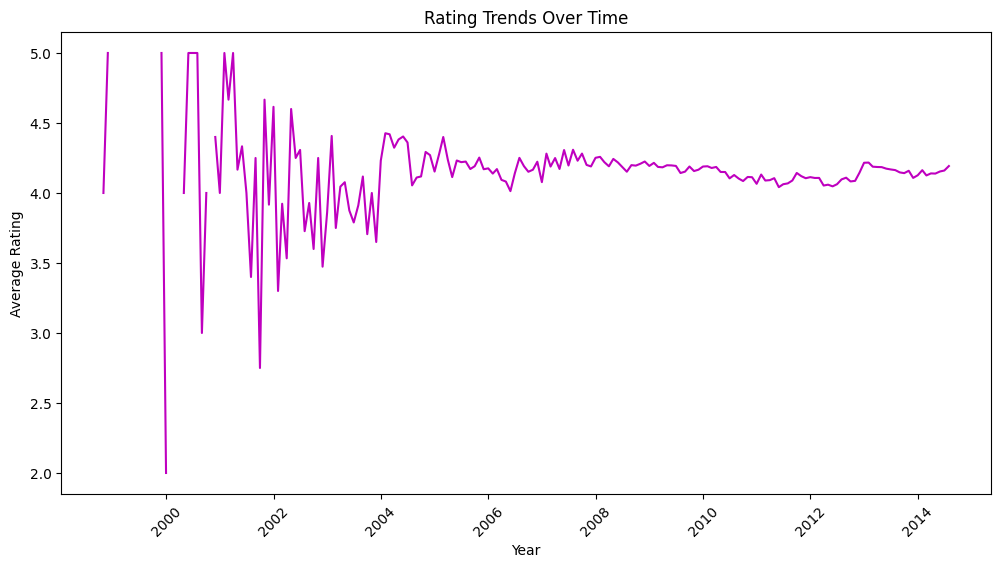

In [ ]:
# Convert 'Timestamp' column to datetime format
df['date'] = pd.to_datetime(df['Timestamp'], unit='s')

# Group by 'Timestamp' and calculate average rating per month
monthly_avg_rating = df.groupby(pd.Grouper(key='date', freq='M'))['Rating'].mean()

# Plot line chart of rating trends over time
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
plt.plot(monthly_avg_rating.index, monthly_avg_rating.values, color = 'm')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Rating Trends Over Time')
plt.xticks(rotation=45)
plt.show()

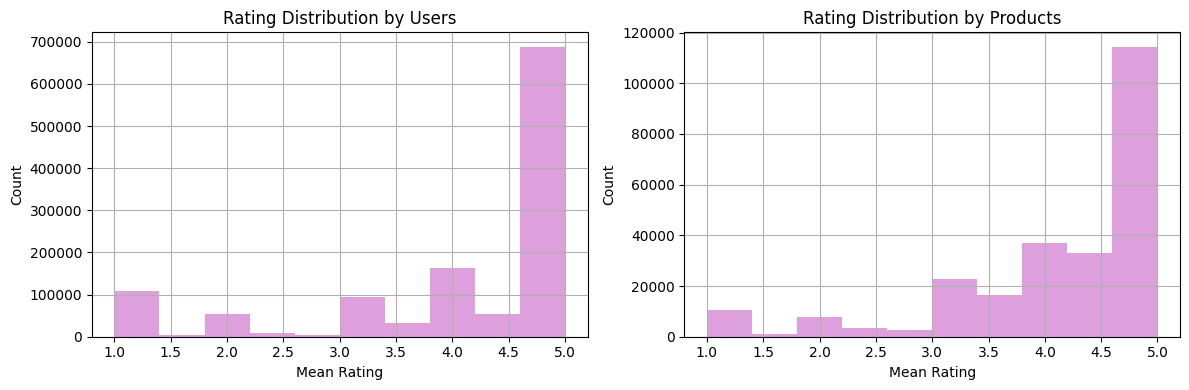

In [ ]:
# Rating Distribution by Users and Products
user_ratings = df.groupby('UserId')['Rating'].mean()
product_ratings = df.groupby('ProductId')['Rating'].mean()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
user_ratings.hist(bins=10, color = 'plum')
plt.xlabel('Mean Rating')
plt.ylabel('Count')
plt.title('Rating Distribution by Users')

plt.subplot(1, 2, 2)
product_ratings.hist(bins=10, color = 'plum')
plt.xlabel('Mean Rating')
plt.ylabel('Count')
plt.title('Rating Distribution by Products')

plt.tight_layout()
plt.show()


In [ ]:
df.groupby('Rating')['UserId'].count() #How many user give each rating

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: UserId, dtype: int64

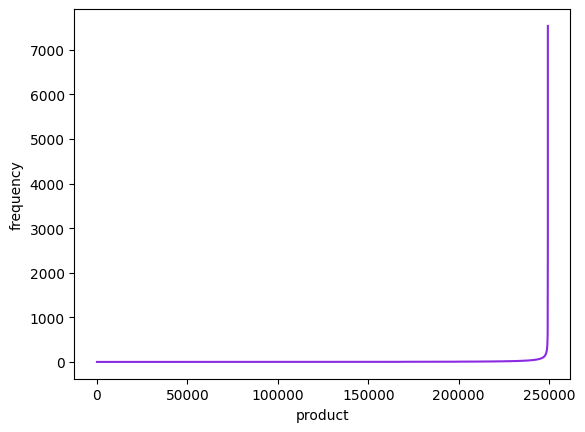

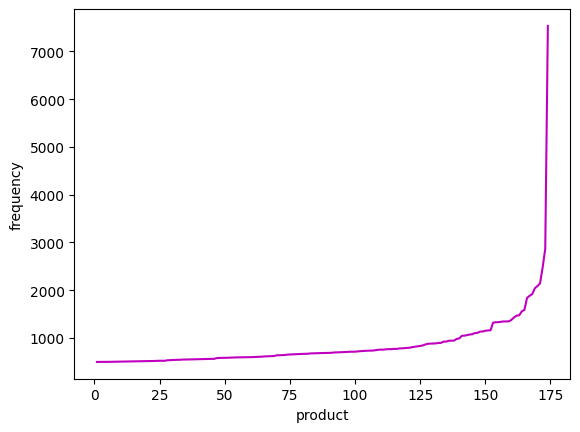

174


In [ ]:
gb_product = df.groupby('ProductId').size()
gb_product = gb_product.sort_values()
plt.plot(range(1, gb_product.shape[0] + 1), gb_product.values, color = 'blueviolet')
plt.xlabel('product')
plt.ylabel('frequency')
plt.show()
high_rated_products = gb_product[gb_product >= 500]
plt.plot(range(1, high_rated_products.shape[0] + 1), high_rated_products.values, color = 'm')
plt.xlabel('product')
plt.ylabel('frequency')
plt.show()
print(high_rated_products.shape[0])

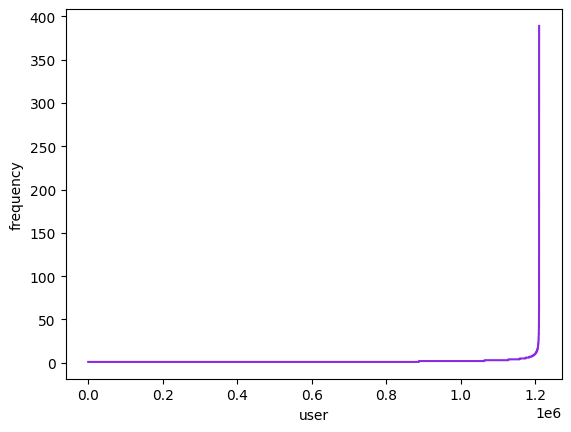

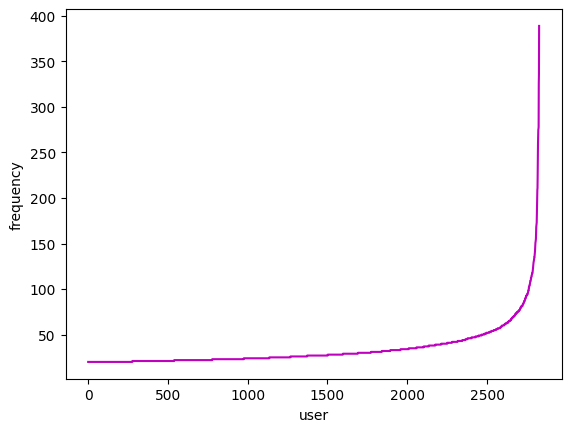

2826


In [ ]:
gb_user = df.groupby('UserId').size()
gb_user = gb_user.sort_values()
plt.plot(range(1, gb_user.shape[0] + 1), gb_user.values, color = 'blueviolet')
plt.xlabel('user')
plt.ylabel('frequency')
plt.show()
high_active_users = gb_user[gb_user >= 20]
plt.plot(range(1, high_active_users.shape[0] + 1), high_active_users.values, color = 'm')
plt.xlabel('user')
plt.ylabel('frequency')
plt.show()
print(high_active_users.shape[0])

In [ ]:
mat_size = len(df.UserId.unique())*len(df.ProductId.unique())
print('the rating matrix will have ', mat_size, 'elements.')
print(len(df) / mat_size * 100, 'percent of the matrix is filled.')

the rating matrix will have  301689093254 elements.
0.0006705810867006465 percent of the matrix is filled.


In [ ]:
df.drop(columns = 'date', inplace = True, axis = 1)

## feature transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Convert categorical columns to numerical format
categorical_columns = ['UserId', 'ProductId']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df

,UserId,ProductId,Rating,Timestamp
0,725046,0,5.0,1369699200
1,814606,1,3.0,1355443200
2,313101,1,5.0,1404691200
3,291075,2,4.0,1382572800
4,802842,3,1.0,1274227200
...,...,...,...,...
2023065,759765,249269,5.0,1405296000
2023066,759765,249270,5.0,1405296000
2023067,1035084,249271,5.0,1405382400
2023068,1195527,249272,5.0,1405555200


## model

In [ ]:
import torch
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm_notebook as tqdm

class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        # create user embeddings
        self.user_factors = torch.nn.Embedding(n_users, n_factors) # think of this as a lookup table for the input.
        # create item embeddings
        self.item_factors = torch.nn.Embedding(n_items, n_factors) # think of this as a lookup table for the input.
        self.user_factors.weight.data.uniform_(0, 0.05)
        self.item_factors.weight.data.uniform_(0, 0.05)

    def forward(self, data):
        # matrix multiplication
        users, items = data[:,0], data[:,1]
        return (self.user_factors(users)*self.item_factors(items)).sum(1)

    def predict(self, user, item):
        return self.forward(user, item)

In [ ]:
# Creating the dataloader
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

class Loader(Dataset):
    def __init__(self):
        self.ratings = df.copy()

        # Extract all user IDs and item IDs
        users = df.UserId.unique()
        items = df.ProductId.unique()

        #--- Producing new continuous IDs for users and items ---

        # Unique values : index
        self.userid2idx = {o:i for i,o in enumerate(users)}
        self.itemid2idx = {o:i for i,o in enumerate(items)}

        # Obtained continuous ID for users and items
        self.idx2userid = {i:o for o,i in self.userid2idx.items()}
        self.idx2itemid = {i:o for o,i in self.itemid2idx.items()}

        # return the id from the indexed values as noted in the lambda function down below.
        self.ratings.ProductId = df.ProductId.apply(lambda x: self.itemid2idx[x])
        self.ratings.UserId = df.UserId.apply(lambda x: self.userid2idx[x])


        self.x = self.ratings.drop(['Rating', 'Timestamp'], axis=1).values
        self.y = self.ratings['Rating'].values
        self.x, self.y = torch.tensor(self.x), torch.tensor(self.y) # Transforms the data to tensors (ready for torch models.)

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.ratings)


In [ ]:
num_epochs = 50
cuda = torch.cuda.is_available()

print("Is running on GPU:", cuda)

model = MatrixFactorization(len(df.UserId.unique()), len(df.ProductId.unique()), n_factors=8)
print(model)
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
# GPU enable if you have a GPU...
if cuda:
    model = model.cuda()

# MSE loss
loss_fn = torch.nn.MSELoss()

# ADAM optimizier
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train data
train_set = Loader()
train_loader = DataLoader(train_set, 128, shuffle=True)

Is running on GPU: True
MatrixFactorization(
  (user_factors): Embedding(1210271, 8)
  (item_factors): Embedding(249274, 8)
)
user_factors.weight tensor([[0.0138, 0.0083, 0.0244,  ..., 0.0395, 0.0165, 0.0104],
        [0.0499, 0.0191, 0.0130,  ..., 0.0179, 0.0070, 0.0256],
        [0.0049, 0.0241, 0.0364,  ..., 0.0251, 0.0354, 0.0082],
        ...,
        [0.0470, 0.0361, 0.0305,  ..., 0.0030, 0.0070, 0.0112],
        [0.0146, 0.0306, 0.0002,  ..., 0.0319, 0.0275, 0.0422],
        [0.0418, 0.0162, 0.0289,  ..., 0.0102, 0.0470, 0.0414]])
item_factors.weight tensor([[0.0108, 0.0011, 0.0361,  ..., 0.0287, 0.0273, 0.0359],
        [0.0230, 0.0147, 0.0271,  ..., 0.0471, 0.0264, 0.0296],
        [0.0159, 0.0314, 0.0256,  ..., 0.0425, 0.0373, 0.0242],
        ...,
        [0.0241, 0.0147, 0.0170,  ..., 0.0270, 0.0404, 0.0277],
        [0.0175, 0.0399, 0.0460,  ..., 0.0448, 0.0128, 0.0047],
        [0.0399, 0.0006, 0.0130,  ..., 0.0416, 0.0474, 0.0287]])


In [ ]:
for it in tqdm(range(num_epochs)):
    losses = []
    for x, y in train_loader:
         if cuda:
            x, y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_fn(outputs.squeeze(), y.type(torch.float32))
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
    print("iter #{}".format(it), "Loss:", sum(losses) / len(losses))

<ipython-input-8-dad152416852>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for it in tqdm(range(num_epochs)):


  0%|          | 0/50 [00:00<?, ?it/s]

iter #0 Loss: 17.303760403608138
iter #1 Loss: 12.84873663762182
iter #2 Loss: 9.447990422186693
iter #3 Loss: 7.12703265812553
iter #4 Loss: 5.526841049675216
iter #5 Loss: 4.3809036506696035
iter #6 Loss: 3.5465237119899857
iter #7 Loss: 2.923155386387872
iter #8 Loss: 2.4695150219728927
iter #9 Loss: 2.127674751148697
iter #10 Loss: 1.8754959578236854
iter #11 Loss: 1.6711042558982465
iter #12 Loss: 1.5054511760972986
iter #13 Loss: 1.3731213312227937
iter #14 Loss: 1.256250234899846
iter #15 Loss: 1.164938983682453
iter #16 Loss: 1.0819539261512119
iter #17 Loss: 1.0143907108492267
iter #18 Loss: 0.9571668858805231
iter #19 Loss: 0.9055371226241554
iter #20 Loss: 0.8600480475694066
iter #21 Loss: 0.8203891374780742
iter #22 Loss: 0.7844884598960714
iter #23 Loss: 0.7556584723370144
iter #24 Loss: 0.7276342992650683
iter #25 Loss: 0.7092946434732209
iter #26 Loss: 0.6846709313936645
iter #27 Loss: 0.6676855688672133
iter #28 Loss: 0.6446839209462621
iter #29 Loss: 0.6283644272232982

In [ ]:
# By training the model, we will have tuned latent factors for items and users.
c = 0
uw = 0
iw = 0
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        if c == 0:
          uw = param.data
          c +=1
        else:
          iw = param.data
        #print('param_data', param_data)

user_factors.weight tensor([[0.4765, 0.3052, 0.3547,  ..., 0.3782, 0.3747, 0.3385],
        [0.4210, 0.3888, 0.3833,  ..., 0.3885, 0.3754, 0.3964],
        [0.6381, 0.6573, 0.6697,  ..., 0.6584, 0.6686, 0.6415],
        ...,
        [0.4901, 0.4791, 0.4736,  ..., 0.4460, 0.4501, 0.4542],
        [0.4413, 0.4573, 0.4269,  ..., 0.4586, 0.4543, 0.4688],
        [0.4552, 0.4297, 0.4424,  ..., 0.4237, 0.4604, 0.4549]],
       device='cuda:0')
item_factors.weight tensor([[1.5345, 1.5252, 1.5601,  ..., 1.5526, 1.5512, 1.5599],
        [0.9938, 0.9890, 1.0007,  ..., 1.0217, 0.9995, 1.0033],
        [0.7095, 0.7250, 0.7192,  ..., 0.7362, 0.7309, 0.7178],
        ...,
        [1.1537, 1.1443, 1.1465,  ..., 1.1565, 1.1699, 1.1573],
        [1.4783, 1.5006, 1.5068,  ..., 1.5056, 1.4736, 1.4655],
        [1.1092, 1.0699, 1.0823,  ..., 1.1109, 1.1167, 1.0980]],
       device='cuda:0')
